##### Importing Modules

In [139]:
from Groups import *
from matplotlib.pyplot import *
from time import time

### Usage

#### General usage using $ D_3 $

In [140]:
G = DihegralGroup(3)

In [141]:
G

Group(e,r^1,r^2,s,sr^1,sr^2)

In [142]:
x = G.Element(1)
y = G.Element(2)
x,y,x*y

(r^1, r^2, e)

In [143]:
R = G.R
R

    	   e	r^1	r^2	s	sr^1	sr^2	
    	   -	---	---	-	----	----	
e	|  e	r^1	r^2	s	sr^1	sr^2	
r^1	|  r^1	r^2	e	sr^2	s	sr^1	
r^2	|  r^2	e	r^1	sr^1	sr^2	s	
s	|  s	sr^1	sr^2	e	r^1	r^2	
sr^1	|  sr^1	sr^2	s	r^2	e	r^1	
sr^2	|  sr^2	s	sr^1	r^1	r^2	e	

In [144]:
R.T # The Calley table

array([[0, 1, 2, 3, 4, 5],
       [1, 2, 0, 5, 3, 4],
       [2, 0, 1, 4, 5, 3],
       [3, 4, 5, 0, 1, 2],
       [4, 5, 3, 2, 0, 1],
       [5, 3, 4, 1, 2, 0]], dtype=int32)

In [145]:
R.Elements # The elements that the Relation is operating over

['e', 'r^1', 'r^2', 's', 'sr^1', 'sr^2']

In [146]:
H = R.generate([1])
H

Group(e,r^1,r^2)

In [147]:
C = Coset(H,2)
C

(r^2 * Group(e,r^1,r^2))

In [148]:
[R[i] for i in C.expand()]

['r^2', 'e', 'r^1']

In [149]:
G.Cosets(H)

[(e * Group(e,r^1,r^2)), (s * Group(e,r^1,r^2))]

In [150]:
N = G.MinimumNormalSubGroup()
N

Group(e,r^1,r^2)

In [151]:
G/N

Group((e * Group(e,r^1,r^2)),(s * Group(e,r^1,r^2)))

In [152]:
gen = G.MinimumGeneratingSet(False)
gen

[3, 1]

In [153]:
G_g = R.generate(gen)
G_g

Group(e,r^1,r^2,s,sr^1,sr^2)

#### $ Z_2^2 $

In [154]:
Z = AdditiveGroupOnIntegersModulo(2)
Z2 = Z**2
Z2

Group((0, 0),(0, 1),(1, 0),(1, 1))

In [155]:
gen = Z2.MinimumGeneratingSet(debug=False)
[Z2.R[g] for g in gen]

[(1, 0), (0, 1)]

#### $ A_5 $

In [156]:
A5 = AlternatingGroup(5)
A5

Group(
[01234],
[01342],
[01423],
[02143],
[02314],
[02431],
[03124],
[03241],
[03412],
[04132],
[04213],
[04321],
[10243],
[10324],
[10432],
[12034],
[12340],
[12403],
[13042],
[13204],
[13420],
[14023],
[14230],
[14302],
[20134],
[20341],
[20413],
[21043],
[21304],
[21430],
[23014],
[23140],
[23401],
[24031],
[24103],
[24310],
[30142],
[30214],
[30421],
[31024],
[31240],
[31402],
[32041],
[32104],
[32410],
[34012],
[34120],
[34201],
[40123],
[40231],
[40312],
[41032],
[41203],
[41320],
[42013],
[42130],
[42301],
[43021],
[43102],
[43210])

In [157]:
gen = A5.MinimalGeneratingSet()
[A5.R[g] for g in gen]

['[01342]', '[02143]', '[02314]', '[02431]', '[10243]', '[12034]', '[12340]']

### Complexity Analysis

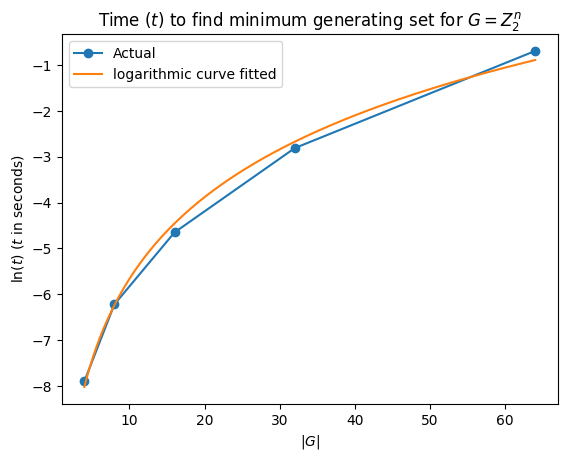

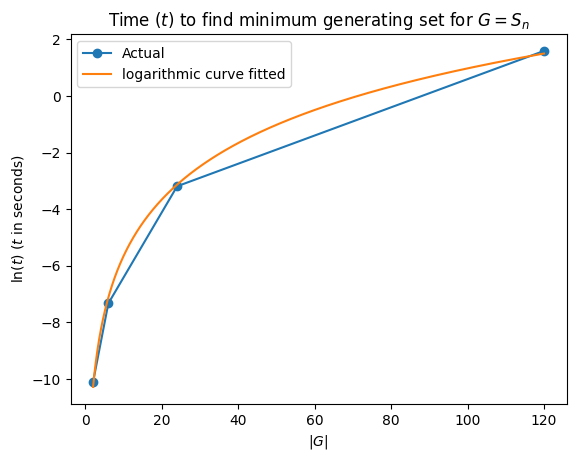

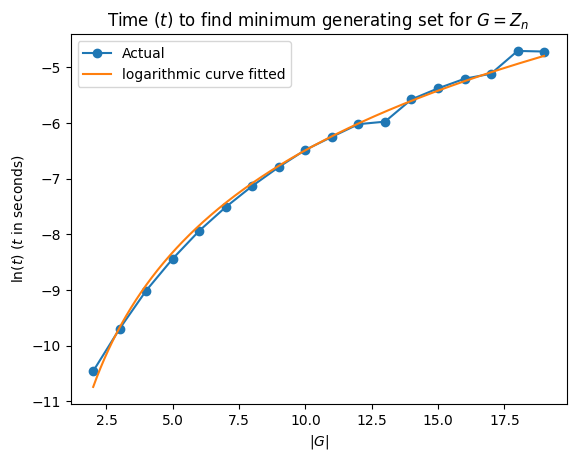

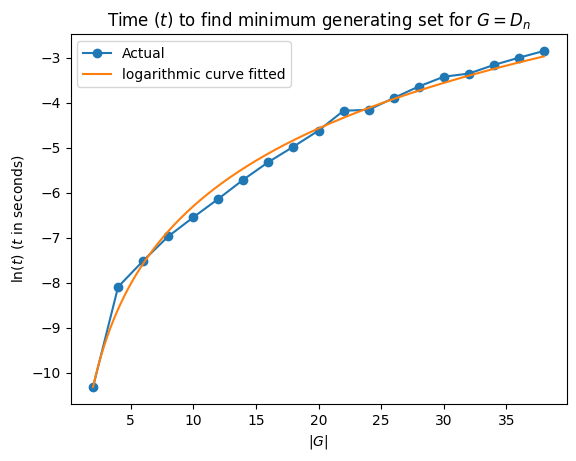

In [158]:
def Z_p_to_n(n,p=2):
    Z = AdditiveGroupOnIntegersModulo(p)
    Z_to_n = Z**n
    assert Z_to_n is not None
    return Z_to_n
D = {
    Z_p_to_n:(7,2,1,5,"Z_2^n"),
    PermutationGroup:(6,2,1,2,'S_n'),
    AdditiveGroupOnIntegersModulo:(20,2,1,10,'Z_n'),
    DihegralGroup:(20,1,1,10,'D_n')
}
for Gfunc in D:
    N,N0,d,iterations,name = D[Gfunc]
    figure()

    y = []
    x = []
    for n in range(N0,N,d):
        G = Gfunc(n)
        assert G is not None
        to = time()
        for _ in range(iterations):
            g = G.MinimumGeneratingSet()
            Gg = G.R.generate(g)
            if not G == Gg:
                print("oof")
                break
        y.append((time()-to)/iterations)
        x.append(len(G))
    y = log(array(y))
    x = array(x)
    plot(x,y,'-o')

    # Curve fitting
    Ln = log(x)
    X = array([[ln,1] for ln in Ln])
    XT = X.T
    XTX = X.T @ X
    XTXi = linalg.inv(XTX)
    pseudo_inverse = XTXi @ XT
    theta = dot(pseudo_inverse,y)
    a,b = theta
    x = linspace(x[0],x[-1],1000)
    Ln = log(x)
    L_pred = Ln*a + b
    plot(x,L_pred)

    xlabel("$ |G| $")
    ylabel("$\ln(t)$ ($ t $ in seconds)")
    title(f"Time ($ t $) to find minimum generating set for $ G = {name} $")
    legend(["Actual",f"logarithmic curve fitted"])